In [1]:
from utils import ReplayBuffer
from agents import DeepQ_MLP
from environments import Game2048
%matplotlib notebook

Using TensorFlow backend.


In [2]:
%%html
<style>
.output_wrapper button.btn.btn-default,
.output_wrapper .ui-dialog-titlebar {
  display: none;
}
</style>

<IPython.core.display.Javascript object>


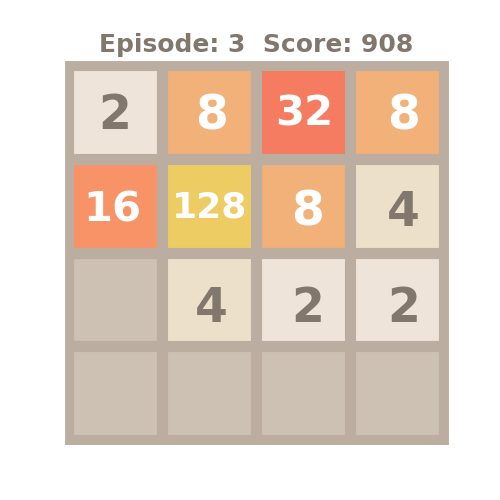

* Episode: 0 score: 1096 actions: 124
learning starts


ValueError: Error when checking target: expected dense_9 to have shape (4,) but got array with shape (1,)

In [5]:
BUFFER_SIZE = 1000000
WARMUP_ACTIONS = 500
C_TARGET_UPDATE = 10000
MINIBATCH_SIZE = 32
LEARNING_RATE = .0005
DISCOUNT_FACTOR = .99999
EPSILON = .05
BETA_1 = .95

# create game, agent and replaybuffer instances
agent = DeepQ_MLP(epsilon=EPSILON, 
                  discount_factor=DISCOUNT_FACTOR, 
                  learning_rate=LEARNING_RATE,
                  beta_1=BETA_1,
                  warmup=WARMUP_ACTIONS,
                  c=C_TARGET_UPDATE)

memory = ReplayBuffer(BUFFER_SIZE)
env = Game2048()
env.reset()
progress = {'scores': [], 'residuals': []}

# Run a number of episodes
for episode in range(20000):
    
    while not(env.done):
        
        env.render(wait=.01, iter_=episode)
        # store previous state
        phi = env.encode_state()
        
        # take one action -> next step and reward
        # this action will be random with probability epsilon
        # and always random before warmup
        action, qmax = agent.qlearning_action(phi, env.tabu)
        
        reward = env.step(action)
        
        # add this tuple (s, a, r, d, s2) to the memory
        memory.add(phi, action, reward, env.done, env.encode_state())
        
        # if within the initial replay buffer start, do nothing
        if agent.a_count >= agent.warmup:
            
            # sample random minibatch of transitions
            minibatch = memory.sample(MINIBATCH_SIZE)
            
            # update plot
            if episode % 25 == 0:
                env.render(wait=.01, iter_=episode)
            
            # perform one step of stochastic gradient descent
            agent.perform_one_step_gd(minibatch)
            
            # Add value to convergence
            action_i = agent.action_str2idx(action)
            new_qmax = agent.Qmodel.predict(phi, batch_size=1)[0, action_i]
            progress['residuals'].append(abs(qmax - new_qmax))
        
    # Add value to scores
    progress['scores'].append(env.score)
    
    if episode % 25 == 0:
        print("* Episode: {} score: {} actions: {}".format(episode, int(env.score), agent.a_count))
                          
    env.reset()

In [ ]:
%matplotlib inline

plt.ioff()
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(scores, 'o')
plt.show()
plt.plot(residuals, 'o')
plt.show()

In [ ]:
plt.plot(residuals)

In [ ]:
minibatch[0][0]

In [ ]:
import numpy as np
np.vstack(minibatch[0])[0,:]